<a href="https://colab.research.google.com/github/ahmedelalaoui142/Forecasting_financial_time_series/blob/main/INTERNSHIP15_predicting_direction_using_randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
df = yf.download('MSFT', start='1990-01-01', end='2024-09-01')
df.sort_index(inplace=True)
data = df[['Close']]

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

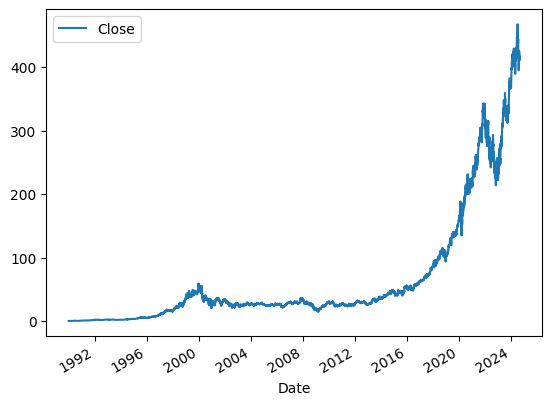

In [ ]:
df.plot.line(y="Close",use_index=True)

In [ ]:
df['Tomorrow'] = df['Close'].shift(-1)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow
Date,,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.380019,53035200,0.619792
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.382160,113774400,0.638021
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.393400,125740800,0.622396
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.383766,69566400,0.631944
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.389653,58982400,0.630208
...,...,...,...,...,...,...,...
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800,413.839996
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900,410.600006
2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700,413.119995


In [ ]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)

In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.380019,53035200,0.619792,1
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.382160,113774400,0.638021,1
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.393400,125740800,0.622396,0
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.383766,69566400,0.631944,1
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.389653,58982400,0.630208,0
...,...,...,...,...,...,...,...,...
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800,413.839996,1
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900,410.600006,0
2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700,413.119995,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1 ) # increase n_estimators, optimize min samples splits



In [ ]:
train = df.iloc[:-44]
train

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
1990-01-02,0.605903,0.616319,0.598090,0.616319,0.380019,53035200,0.619792,1
1990-01-03,0.621528,0.626736,0.614583,0.619792,0.382160,113774400,0.638021,1
1990-01-04,0.619792,0.638889,0.616319,0.638021,0.393400,125740800,0.622396,0
1990-01-05,0.635417,0.638889,0.621528,0.622396,0.383766,69566400,0.631944,1
1990-01-08,0.621528,0.631944,0.614583,0.631944,0.389653,58982400,0.630208,0
...,...,...,...,...,...,...,...,...
2024-06-24,449.799988,452.750000,446.410004,447.670013,446.864594,15913700,450.950012,1
2024-06-25,448.250000,451.420013,446.750000,450.950012,450.138672,16747500,452.160004,1
2024-06-26,449.000000,453.600006,448.190002,452.160004,451.346497,16507000,452.850006,1


In [ ]:
test=df.iloc[-44:]
test

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2024-07-01,448.660004,457.369995,445.660004,456.730011,455.908264,17662800,459.279999,1
2024-07-02,453.200012,459.589996,453.109985,459.279999,458.453674,13979800,460.769989,1
2024-07-03,458.190002,461.019989,457.880005,460.769989,459.940979,9932800,467.559998,1
2024-07-05,459.609985,468.350006,458.970001,467.559998,466.718781,16000300,466.239990,0
2024-07-08,466.549988,467.700012,464.459991,466.239990,465.401154,12962300,459.540009,0
2024-07-09,467.000000,467.329987,458.000000,459.540009,458.713226,17207200,466.250000,1
2024-07-10,461.220001,466.459991,458.859985,466.250000,465.411133,18196100,454.700012,0
2024-07-11,462.980011,464.779999,451.549988,454.700012,453.881927,23111200,453.549988,0
2024-07-12,454.329987,456.359985,450.649994,453.549988,452.733978,16324300,453.959991,1


In [ ]:
predictiors= ["Close", "Volume"]

In [ ]:
model.fit(train[predictiors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictiors])

In [ ]:
import pandas as pd

In [ ]:
preds = pd.Series(preds,index=test.index)

In [ ]:
precision_score(test["Target"],preds)

0.5333333333333333

In [ ]:
combined = pd.concat([test['Target'],preds], axis=1)

<Axes: xlabel='Date'>

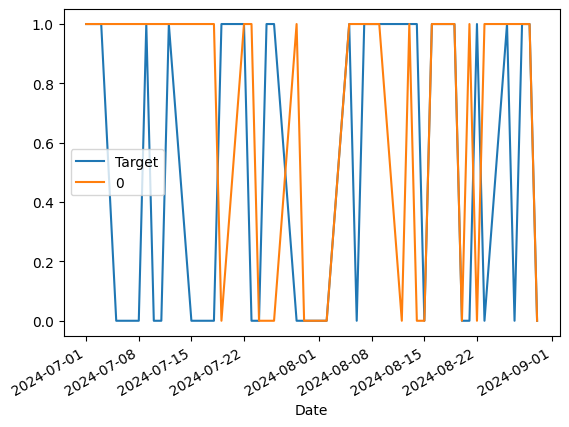

In [ ]:
combined.plot()

In [ ]:

def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
predictions = backtest(df, model, predictiors)

In [ ]:
predictions["Predictions"].value_counts()


,count
Predictions,
0,3821
1,2412


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5107794361525705

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]


,count
Target,
1,0.507621
0,0.492379


In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
1993-12-14,2.531250,2.546875,2.476563,2.500000,1.541485,47414400,2.492188,0,0.991479,0.0,0.980693,1.0,0.987045,33.0,0.955338,108.0,1.321613,496.0
1993-12-15,2.500000,2.531250,2.492188,2.492188,1.536668,35219200,2.500000,1,0.998435,0.0,0.986700,1.0,0.983202,32.0,0.952819,108.0,1.316181,495.0
1993-12-16,2.500000,2.531250,2.492188,2.500000,1.541485,29113600,2.515625,1,1.001565,1.0,0.992556,2.0,0.985727,32.0,0.956286,108.0,1.319009,495.0
1993-12-17,2.515625,2.515625,2.492188,2.515625,1.551118,26112000,2.562500,1,1.003115,2.0,1.002179,2.0,0.991532,32.0,0.962596,109.0,1.325929,496.0
1993-12-20,2.531250,2.562500,2.515625,2.562500,1.580022,35462400,2.578125,1,1.009231,2.0,1.019267,3.0,1.009593,32.0,0.980779,110.0,1.349262,496.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800,413.839996,1,0.996025,1.0,0.986958,2.0,0.955602,34.0,1.050020,138.0,1.370401,515.0
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900,410.600006,0,1.000423,1.0,0.992989,2.0,0.956458,34.0,1.049998,138.0,1.370668,516.0
2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700,413.119995,1,0.996070,1.0,0.991658,2.0,0.949077,34.0,1.040913,137.0,1.359053,516.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined


In [ ]:
predictions = backtest(df, model, new_predictors)


In [ ]:
predictions["Predictions"].value_counts()


,count
Predictions,
0.0,4857
1.0,376


In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5372340425531915

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]


,count
Target,
1,0.51137
0,0.48863


In [ ]:
predictions


,Target,Predictions
Date,,
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,0.0
2003-11-19,0,0.0
2003-11-20,1,0.0
...,...,...
2024-08-26,1,0.0
2024-08-27,0,0.0
2024-08-28,1,0.0
